# Project: Investigating a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project will investigate The Movie Database (TMDb) to analyise trends in revenue and popularity.

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Initial questions for analysis
Which genre generates the most revenue?
Does popularity equate to a higher revenue?

In [1]:
#Import statements for all of the packages to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#Including the 'magic word' so that visualizations are plotted inline with the notebook
#Ref: http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
#Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

This section of the report, the data will be loaded, checked for cleanliness, then trimed and cleaned for analysis.


### General Properties

In [3]:
# Load data and print out a few lines, and identify its shape
df = pd.read_csv('tmdb-movies2.csv')
df.shape

(10866, 21)

Rows, Columns

In [4]:
df.head();

ID could be used as the index column - but must first check for duplicates;
IMDB_ID, Overeiw, Keywords may be not useful - will remove these columns;
Could use homepage column to check if having a website increases popularity


In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isna().sum();

Missing values in imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production companies

In [7]:
df.describe();

Budget and Revenue may have many 0 values which seems incorrect unless if films are independantly made or do not declare values.

Max run time is 900, it may be 90 minutes, min run time can not be 0.

Max vote count is 9767, which may be incorect.

Now let's observe if we can notice any correlation distributions

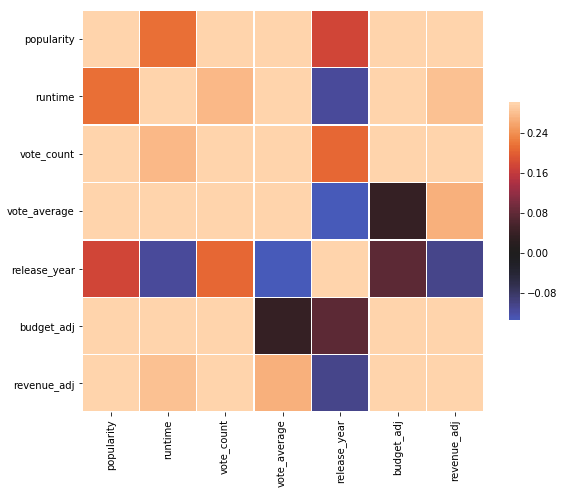

In [33]:
corrmat = df.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Can see numerous corelations such as a correlation between adjusted budgets and revenues.


### Data Cleaning
 

First check for duplicates

In [9]:
df.duplicated().sum();

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(10865, 21)

One duplicate replaced

Drop Columns not needed and set ID as the index column.

Dropped revenue and budget columns as their adjusted values will be used in analysis.

In [12]:
df = df.drop(["imdb_id", "director", "keywords", "overview", "tagline", "homepage", "production_companies", "cast", "budget", "revenue"], axis=1)

In [13]:
df = df.set_index('id')

Lets see cleaned data

In [14]:
df.tail()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
21,0.080598,The Endless Summer,95,Documentary,6/15/66,11,7.4,1966,0.000000,0.0
20379,0.065543,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000,0.0
39768,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000,0.0
21449,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,1966,0.000000,0.0
22293,0.035919,Manos: The Hands of Fate,74,Horror,11/15/66,15,1.5,1966,127642.279154,0.0


Let's explore the data to check for "dirty" data. General histogram to see the data.

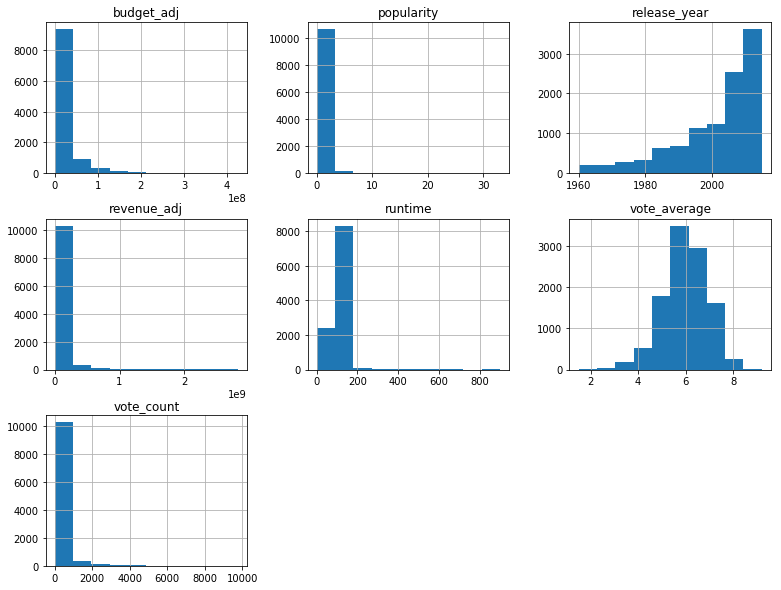

In [15]:
df.hist(figsize=(13,10));

Can be seen that more films are being released more recently

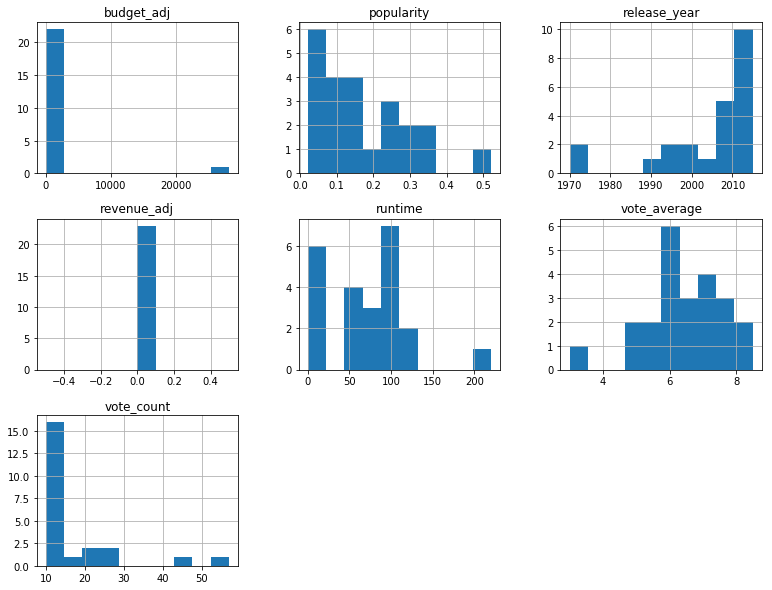

In [16]:
df[df.genres.isnull()].hist(figsize=(13,10));

Null values match the average shape of the data set, just slightly less popular as they have lower vote counts

Movies without a defined genre seem to be smaller indie films that generate lower revenue.

Worth keeping these rows for numerical analysis.

Set missing genres to Unknown then check to ensure there are no missing values

In [17]:
df['genres'] = df['genres'].fillna("Unknown")
df['genres'].isna().sum()

0

Lets check to see how many 0 values we have.

In [18]:
df.query("(revenue_adj == 0)").shape

(6016, 10)

In [19]:
df.query("(vote_average == 0)").shape

(0, 10)

In [20]:
df.query("(runtime == 0)").shape

(31, 10)

There are a lot of values with zero revenue, let's remove these potential outliers

In [21]:
df = df[df['revenue_adj'] > 1]
df = df[df['budget_adj'] > 1]
#df_n_zero = df[df['vote_average'] > 0.5]

Check to see if removed, let's make sure we have no movies with 0 runtime

In [22]:
df.query("(revenue_adj == 0)").shape

(0, 10)

In [23]:
df.query("(runtime == 0)").shape

(0, 10)

- All runtimes of 0 had 0 revenue

- Now using describe again to see the changes from before - data quality has improved

In [24]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,1.191728,109.225279,527.842979,6.168388,2001.258500,4.425148e+07,1.371003e+08
std,1.475314,19.922999,880.038066,0.794900,11.282948,4.480940e+07,2.161281e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,1.309053e+00,2.370705e+00
25%,0.462287,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is cleaned we can explore trends. This section is broken into 2 questions which will analyse the trends.


### Question 1: Does popularity equate to higher adjusted revenue

First a function is defined to help minimise the code spent writing out equations for plotting grapghs

In [35]:
def plot_scatter(df, x_variable, y_variable, title=None, xlim=None, x_label=None, y_label=None,):
    fig, ax = plt.subplots()
    sns.regplot(x=df[x_variable], y=df[y_variable], ci=95, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax)
    ax.set_xlim(xlim) #(0, 10)
    ax.set_title(title)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    #ax.set_ylabel(y_label)

Let's plot a graph of revenue vs popularity to see if there's any correlation

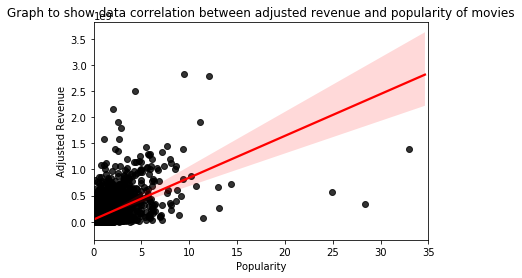

In [52]:
plot_scatter(df,  y_variable='revenue_adj', x_variable='popularity', xlim=(0,35), x_label="Popularity", y_label="Adjusted Revenue", title="Graph to show data correlation between adjusted revenue and popularity of movies")

Can clearly see a positive correlation, but can we plot the data so the points are more clearer? Perhaps seting a x axis limit to a smaller value to see the plot better. A 0<p<10 range is used

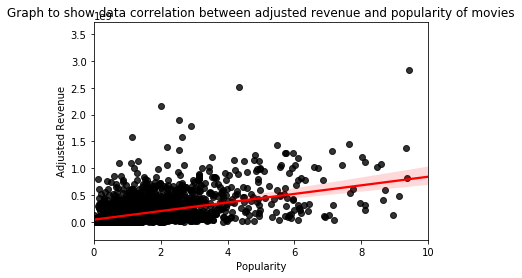

In [51]:
plot_scatter(df,  y_variable='revenue_adj', x_variable='popularity', xlim=(0,10), x_label="Popularity", y_label="Adjusted Revenue", title="Graph to show data correlation between adjusted revenue and popularity of movies")

The correlation is clear to see, check to see if there is a possible relationship with the square root of revenue with popularity.

In [42]:
df['rev_adj_root'] = np.sqrt(df['revenue_adj'])


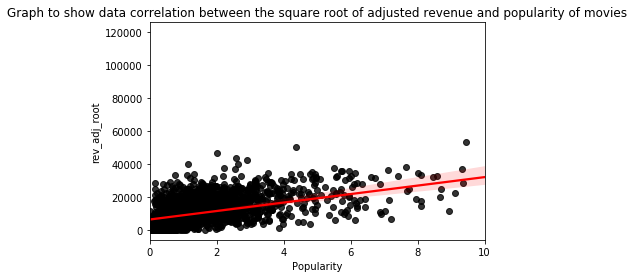

In [45]:
plot_scatter(df,  y_variable='rev_adj_root', x_variable='popularity', xlim=(0,10), x_label="Popularity", title="Graph to show data correlation between the square root of adjusted revenue and popularity of movies")

Results were very similar, lets use a statistical correlation function to verify.

In [50]:
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,rev_adj_root
popularity,1.000000,0.215010,0.780082,0.317795,0.173401,0.399300,0.546928,0.537437
runtime,0.215010,1.000000,0.273679,0.351535,-0.112262,0.333811,0.280394,0.302295
vote_count,0.780082,0.273679,1.000000,0.387132,0.207339,0.497914,0.654658,0.636141
vote_average,0.317795,0.351535,0.387132,1.000000,-0.134035,0.036533,0.266720,0.283302
release_year,0.173401,-0.112262,0.207339,-0.134035,1.000000,0.075341,-0.103020,-0.131462
budget_adj,0.399300,0.333811,0.497914,0.036533,0.075341,1.000000,0.570390,0.638755
revenue_adj,0.546928,0.280394,0.654658,0.266720,-0.103020,0.570390,1.000000,0.922855
rev_adj_root,0.537437,0.302295,0.636141,0.283302,-0.131462,0.638755,0.922855,1.000000


Correlation of poularity with adjusted revenue and the root of adjusted revenue are very similar, so it did not improve the correlation of the results.
Correlation is 0.547 with adjusted revenue. A slightly weaker correlation but still shows films that are more popular tend to generate higher revenue.

### Question 2: Which genre generates the most revenue

First lets see how the data is formatted, group by

In [53]:
df.groupby('genres')['revenue_adj'].sum();


Data is seperated by "|", need to clean data first

In [54]:
#g = ['Action', 'Adventure', 'Comedy', 'Crime, Drama', 'Family, Fantasy', 'Science Fiction', 'Thriller']

In [55]:
#for g in df['genres']:
   #df[g] = g in df['genres'].str.split('|')
    #This will take too long, need an alternative

Explode function can solve this issue but will create multiple extra columns, hence need to average the values.
Create a new df so old one stays intact

In [58]:
#Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [59]:
df1 = df.assign(genres=df.genres.str.split('|'))

In [60]:
df1.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rev_adj_root
id,,,,,,,,,,,
135397,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,37315.491321
76341,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,18659.080698
262500,13.112507,Insurgent,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,16480.868466
140607,11.173104,Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,43620.214692
168259,9.335014,Furious 7,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,37225.647093


Square brackets indicate a list, now seperated by commas, explode function can be used

In [61]:
df1 = df1.explode('genres')
df1.head()

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rev_adj_root
id,,,,,,,,,,,
5,1.234890,Four Rooms,98,Comedy,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06,2480.555891
11,12.037933,Star Wars,121,Adventure,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,52817.726591
11,12.037933,Star Wars,121,Action,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,52817.726591
11,12.037933,Star Wars,121,Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,52817.726591
12,3.440519,Finding Nemo,100,Animation,5/30/03,3692,7.4,2003,1.114231e+08,1.024887e+09,32013.851530


Perfect, now lets take the average of the results as movies will have multiple instances.

Let's check popularity and revenue

In [62]:
df1_genere_pop = df1.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df1_genere_pop;

No "unknown" genre, suggesting they were eliminated when the data was cleaned from earlier.

Let's visualise the results

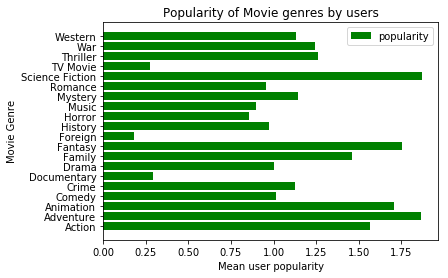

In [63]:
plt.barh(df1_genere_pop['genres'],df1_genere_pop['popularity'],color="green",label='popularity')
plt.title('Popularity of Movie genres by users')
plt.legend();
plt.xlabel('Mean user popularity')
plt.ylabel('Movie Genre');

Adjusted revenue vs Genre

Can clearly see the most popular genres are: Science Fiction, Animation, Adventure, Fantasy and Family.

The genres that aren't popular are: Documentary, Foreign, TV Movie.

In [64]:
df1_genere_rev = df1.groupby(['genres'],as_index=False)['revenue_adj'].mean().sort_values(by=['revenue_adj'])
df1_genere_rev;

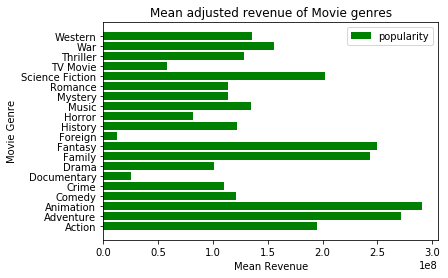

In [65]:
plt.barh(df1_genere_rev['genres'],df1_genere_rev['revenue_adj'],color="green",label='popularity')
plt.title('Mean adjusted revenue of Movie genres')
plt.legend();
plt.xlabel('Mean Revenue')
plt.ylabel('Movie Genre');

The mean revenue figure shows some genres generate more revenue than others: Animation, Fantasy, Family, Adventure. Science fiction and action aren't as high as the others.

Some genres typically underperform: Foreign and documentary. Tv movie does slightly better.

Comparing popularity and revenue by genre we can see the similarities. If a movie genre is popular, it will likely also have a higher adjusted revenue.


<a id='conclusions'></a>
## Conclusions
A correlation between popularity and revenue was first identified.
When analysing the genres of the movies a clear pattern was observed, where certain genres were both popular and generated more revenue. This not only reinforced the findings in the first question but also highlighted the inequality of revenue generated by certain genres vs others (most notably Animation vs Foreign).
Overall the data set provided pleanty of analysis, but further work can also be done.


- Aditional research could be done to identify the profits (revenue-budget). Although the budget may not necessarily be the exact cost spent, it could be very useful to assume the adjusted budget = budget used.
Further work could also be done in identifying if the run time of a movie increases or decreases the popularity of a film (i.e. too long/ short may decrease popularity).

- It should be noted that the data itself it outdated and does not account for movies beyond 2015. New data may contradict the results. Furthermore, many assumptions were made to remove data with 0 values in adjusted revenue/ budget columns, it maybe possible these films did make 0 revenue although unlikely.
If this work would be repeated, statistical tests should be done as well, such as using pearson correlation coefficients, to further test if the line of best fits are suitable.


In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0